In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import fashion_mnist

In [14]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [15]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
     

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [16]:
# add noise
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
     

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

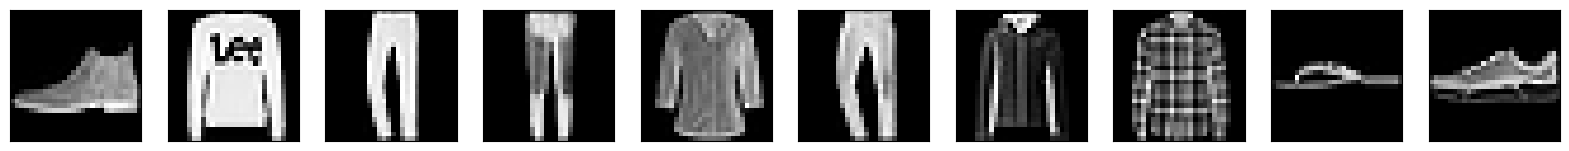

In [23]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

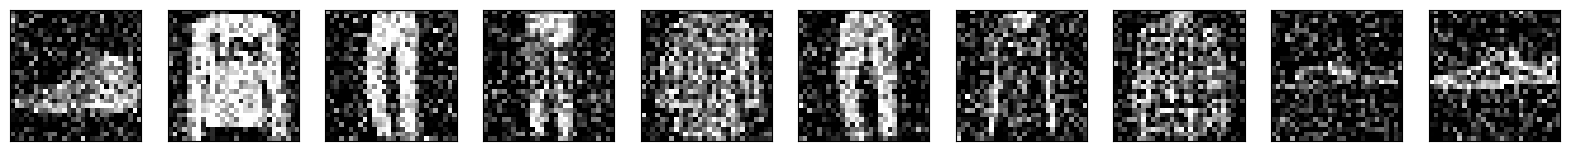

In [24]:


n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [19]:
model = Sequential([
                    # encoder 
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder 
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output 
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 16)      

In [20]:

model.fit(x_train_noisy, x_train, epochs=25, batch_size=64, validation_data=(x_test_noisy, x_test))
     

Epoch 1/25
938/938 [==============================] - 180s 190ms/step - loss: 0.3065 - accuracy: 0.5063 - val_loss: 0.2908 - val_accuracy: 0.5051
Epoch 2/25
938/938 [==============================] - 168s 179ms/step - loss: 0.2858 - accuracy: 0.5078 - val_loss: 0.2859 - val_accuracy: 0.5060
Epoch 3/25
938/938 [==============================] - 165s 176ms/step - loss: 0.2823 - accuracy: 0.5083 - val_loss: 0.2832 - val_accuracy: 0.5064
Epoch 4/25
938/938 [==============================] - 167s 178ms/step - loss: 0.2799 - accuracy: 0.5086 - val_loss: 0.2810 - val_accuracy: 0.5066
Epoch 5/25
938/938 [==============================] - 166s 176ms/step - loss: 0.2782 - accuracy: 0.5088 - val_loss: 0.2799 - val_accuracy: 0.5067
Epoch 6/25
938/938 [==============================] - 168s 179ms/step - loss: 0.2771 - accuracy: 0.5089 - val_loss: 0.2786 - val_accuracy: 0.5067
Epoch 7/25
938/938 [==============================] - 168s 180ms/step - loss: 0.2763 - accuracy: 0.5089 - val_loss: 0.2783 -

In [21]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 8s 24ms/step


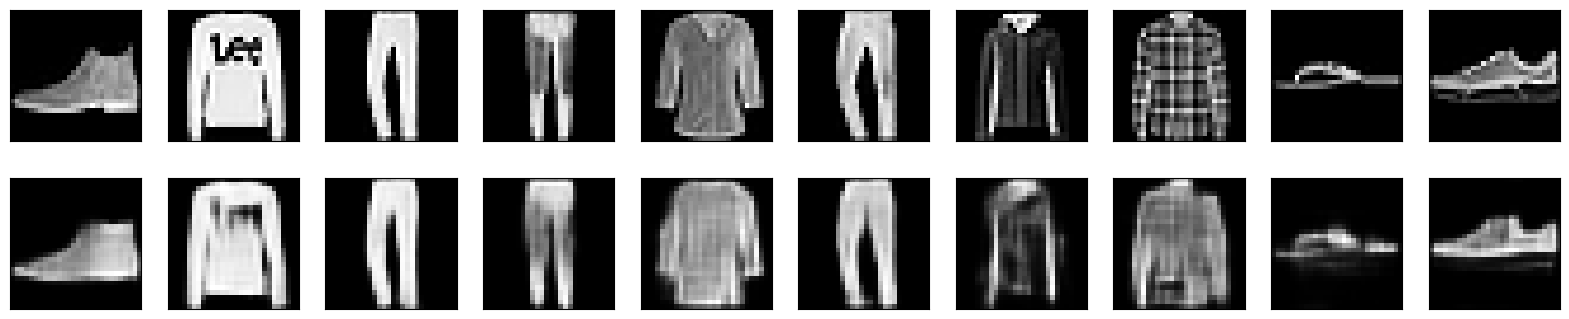

In [25]:


n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()